In [1]:
#!/usr/bin/env python3
"""
HRP Portfolio Optimizer
Author: John E. Putman II
Date: 12/13/2024
"""

# Standard library imports
import sys
import warnings
from pathlib import Path

# Configure path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
sys.path.append(str(project_root))

# Third-party imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suppress warnings
warnings.filterwarnings('ignore')

# Local application imports
from src.data_handler import DataHandler
from src.hrp_core import create_hrp_portfolio
from src.visualization import plot_portfolio_analysis


In [2]:
# Environment Information
print(f"Python version: {sys.version}")
print("\nKey package versions:")
for package in ['numpy', 'pandas', 'matplotlib', 'yfinance']:
    print(f"{package}: {__import__(package).__version__}")

Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]

Key package versions:
numpy: 1.23.5
pandas: 1.5.3
matplotlib: 3.7.1
yfinance: 0.2.36


INFO:src.hrp_core:Downloading historical data...
[*********************100%%**********************]  400 of 400 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-01 -> 2024-12-10)')
INFO:src.hrp_core:Calculating correlation and distance matrices...
INFO:src.hrp_core:Performing hierarchical clustering...
INFO:src.hrp_core:Calculating cluster risk metrics...
INFO:src.hrp_core:Applying market cap constraints...
INFO:src.hrp_core:Portfolio optimization complete



Final Portfolio Allocation:
Ticker
A       0.0000
AAL     0.0000
ABBV    0.0382
ABT     0.0244
ACGL    0.0000
         ...  
TGT     0.0000
TJX     0.0000
TMO     0.0252
TMUS    0.0325
TPR     0.0000
Length: 389, dtype: float64


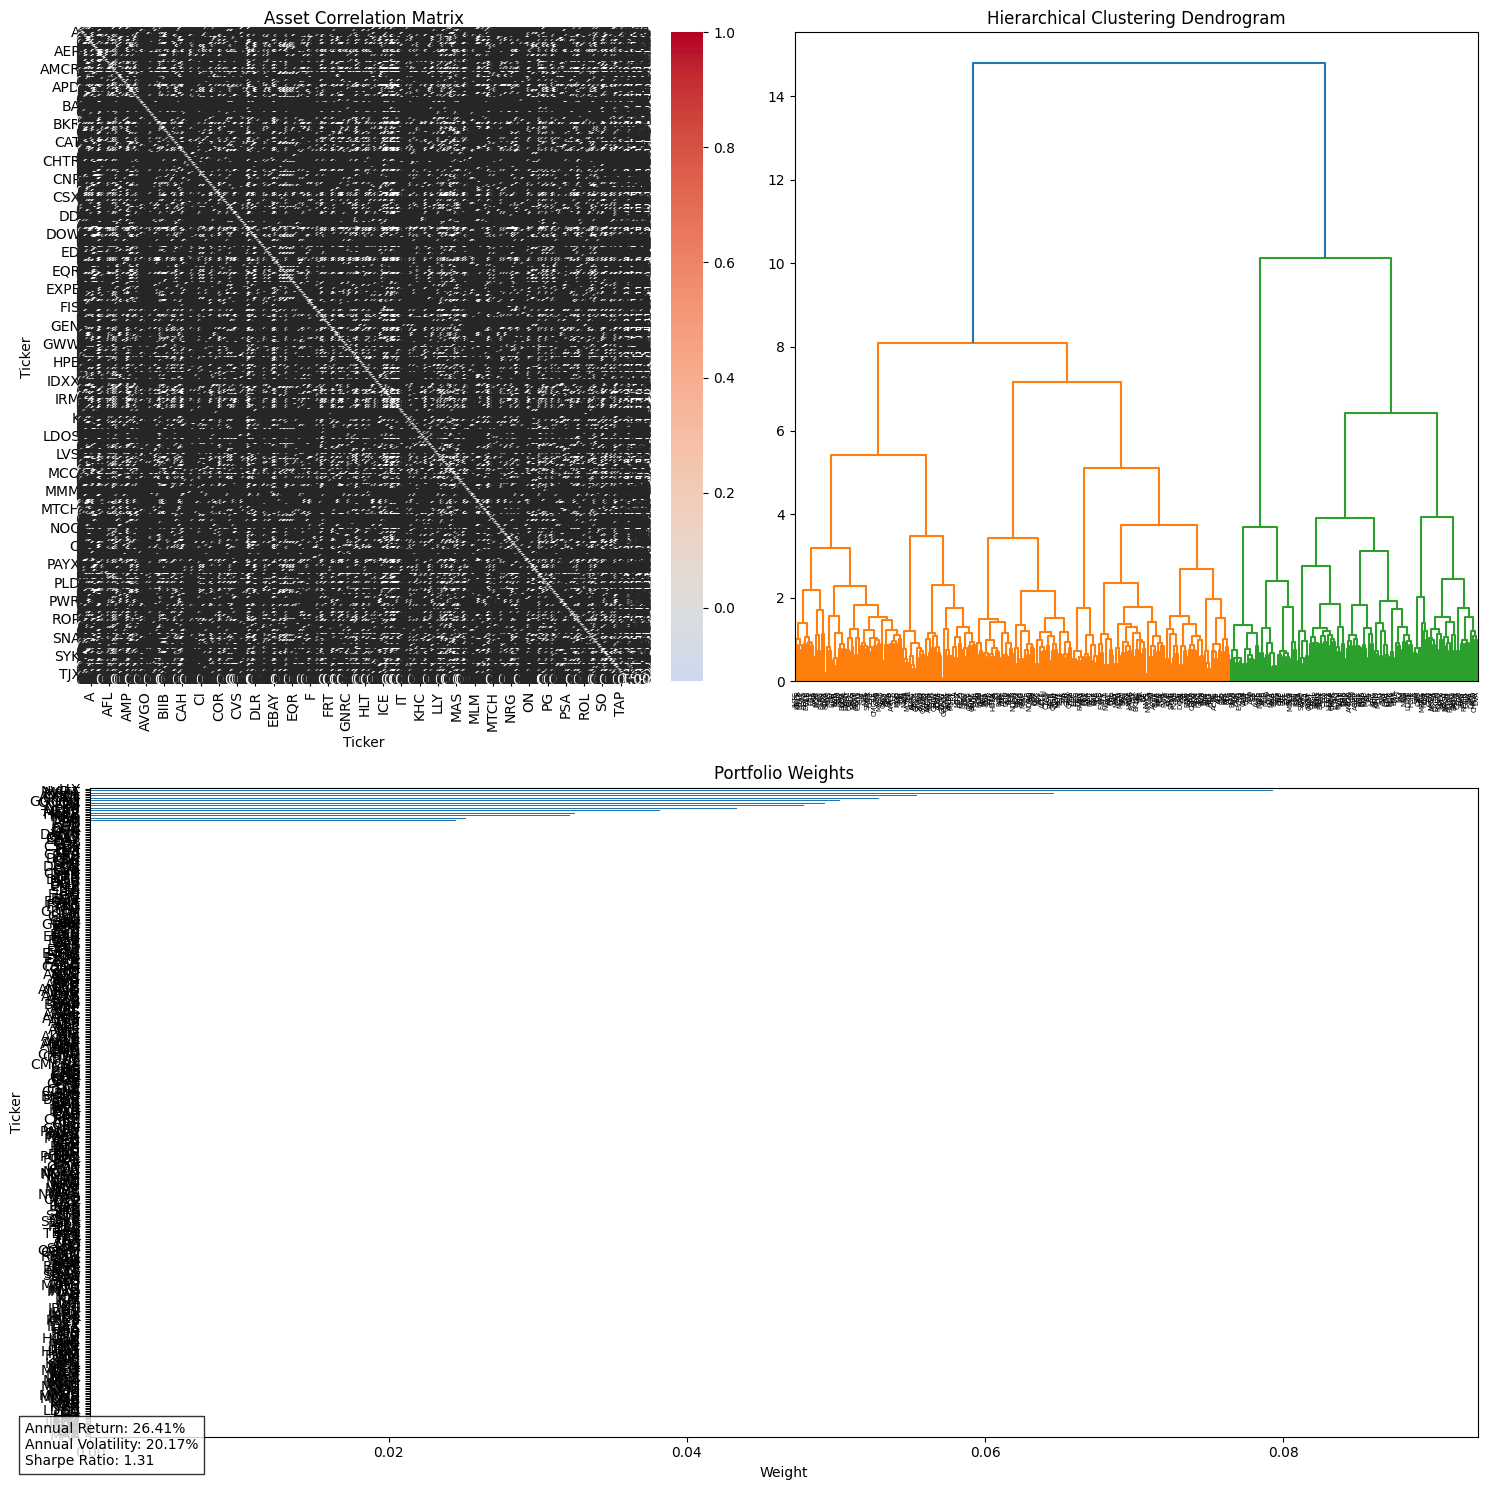

In [4]:
if __name__ == "__main__":
    handler = DataHandler()
    
    df = handler.load_market_data('../data/sp500_data.csv', 2000) # data file, minimum market cap in millions
    df = handler.calculate_quality_metrics(df)
    hrp_df = handler.prepare_hrp_data(df)
    
    try:
        weights, linkage_matrix, returns = create_hrp_portfolio(
            tickers=hrp_df['ticker'].tolist(),
            market_caps=hrp_df['market_cap'].tolist(),
            start_date="2019-05-01",
            end_date="2024-12-10"
        )
        
        print("\nFinal Portfolio Allocation:")
        print(weights.round(4))
        
        fig = plot_portfolio_analysis(returns, weights, linkage_matrix)
        plt.show()
        
    except Exception as e:
        print(f"Failed to create portfolio: {e}")